In [7]:
import numpy as np
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)  # differenciation of 
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum()
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def activation(self, X):
        return X
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [8]:
class MultiAdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta  
        self.n_iter = n_iter 
        self.random_state = random_state 
    def fit(self, X, y):
        self.classes = np.unique(y.tolist())
        self.adas = []
        for class_ in self.classes:
            y_temp = np.where(y == class_, 1, -1)
            self.adas.append(AdalineGD(eta=self.eta, n_iter=self.n_iter))
            self.adas[class_].fit(X, y_temp)
    def predict(self, X):
        f = []
        for ada in self.adas:
            f.append(ada.activation(ada.net_input(X))))
        return np.argmax(f, axis=0)

In [9]:
import pandas as pd  
df_trainX = pd.read_csv("/home/jiarui/Documents/3314/COMP3314_a1/dataset_files/iris_X_train.csv", header=0, error_bad_lines=False)
df_trainy = pd.read_csv("/home/jiarui/Documents/3314/COMP3314_a1/dataset_files/iris_y_train.csv", header=0, error_bad_lines=False)
df_testX = pd.read_csv("/home/jiarui/Documents/3314/COMP3314_a1/dataset_files/iris_X_test.csv", header=0, error_bad_lines=False)
df_testy = pd.read_csv("/home/jiarui/Documents/3314/COMP3314_a1/dataset_files/iris_y_test.csv", header=0, error_bad_lines=False)
X_train = df_trainX.iloc[:].values
y_train = df_trainy.iloc[:, 0].values 
X_test = df_testX.iloc[:].values
y_test = df_testy.iloc[:, 0].values

markers = ('o', 'x', 's', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
labels = ('Versicolour', 'Virginica', 'Setosa')

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in square
/home/jiarui/snap/jupyter/common/lib/python3.7/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in add
  from ipykernel import kernelapp as app
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/home/jiarui/snap/jupyter/common/lib/python3.7/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in square
/snap/jupyter/6/lib/python3.7/site-packages/ipyker

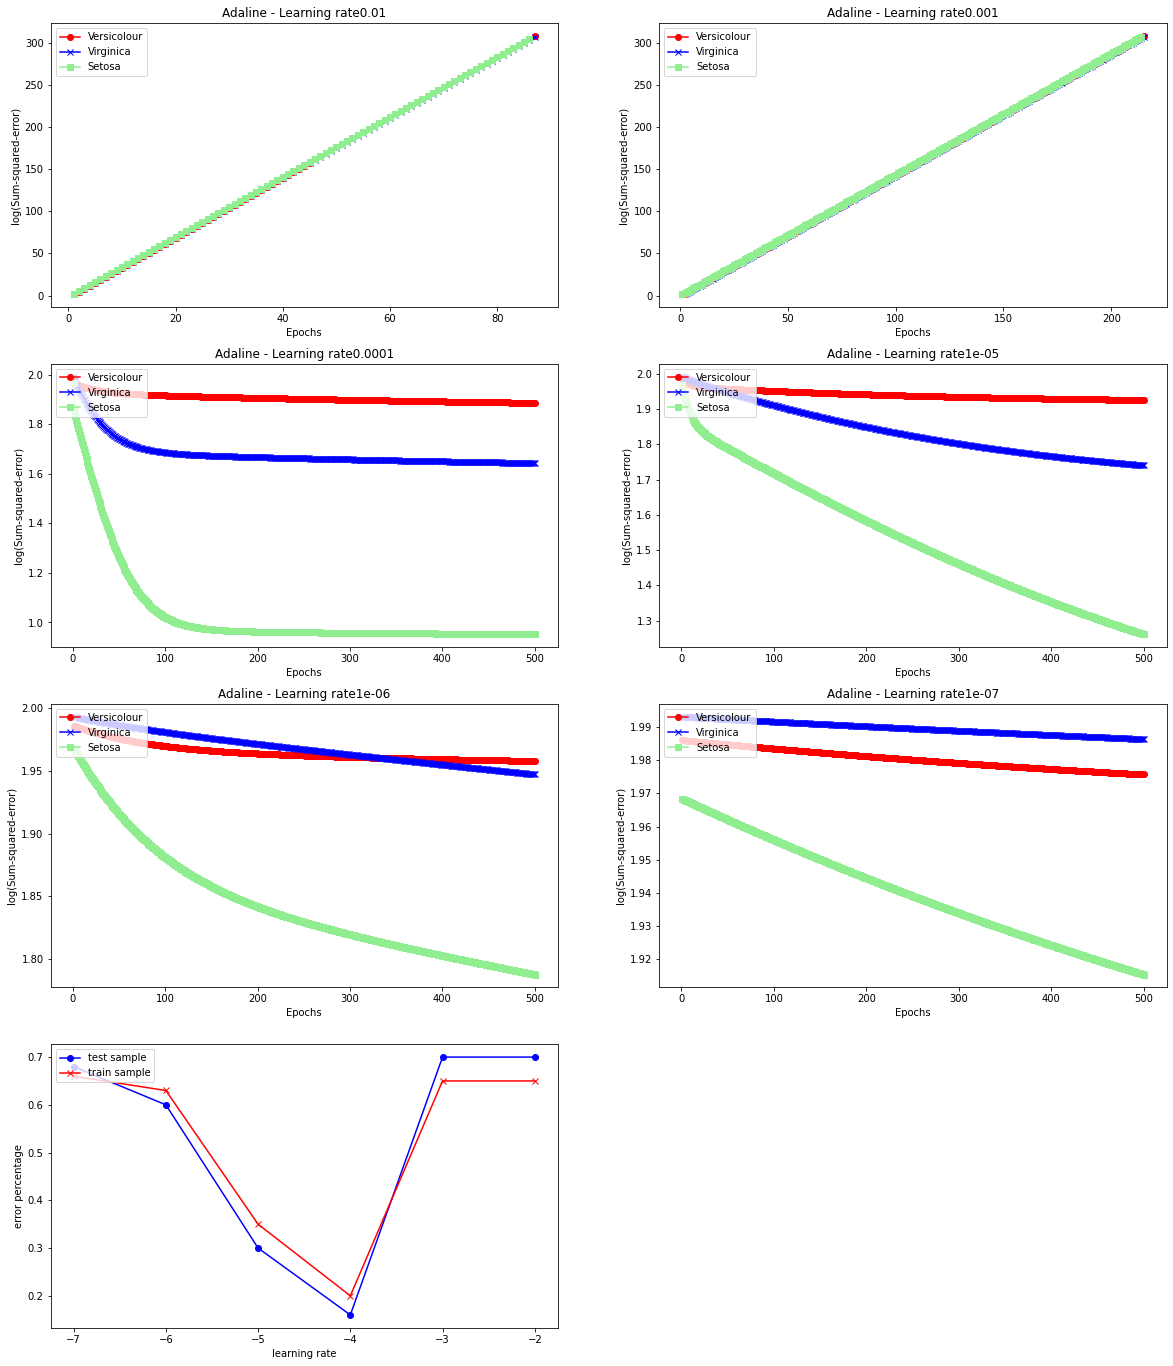

<Figure size 432x288 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt
rows, cols = 3, 2
fig, ax = plt.subplots(nrows=rows+1, ncols=cols, figsize=(10*cols, 8*rows))
etas = []
ada = []
test_error = []
train_error = []
plt.figure()
for i in range(rows*cols):
    etas.append(10**(-2-i))
for i in range(rows*cols):
    ada.append(MultiAdalineGD(n_iter=500, eta=etas[i]))
    ada[i].fit(X_train, y_train)
    for class_ in ada[i].classes:
        ax[i//cols][i%cols].plot(range(1, len(ada[i].adas[class_].cost_)+1), np.log10(ada[i].adas[class_].cost_), marker=markers[class_], color=colors[class_], label=labels[class_])
    ax[i//cols][i%cols].set_xlabel('Epochs')
    ax[i//cols][i%cols].set_ylabel('log(Sum-squared-error)')
    ax[i//cols][i%cols].set_title('Adaline - Learning rate'+str(etas[i]))
    ax[i//cols][i%cols].legend(loc='upper left')
    y_pred = ada[i].predict(X_test)
    test_error.append((y_test!=y_pred).sum()/len(y_test))
    y_pred = ada[i].predict(X_train)
    train_error.append((y_train!=y_pred).sum()/len(y_train))

ax[-1][0].set_xlabel('learning rate')
ax[-1][0].set_ylabel('error percentage')
ax[-1][0].plot(np.log10(etas), test_error, marker='o', color='blue', label='test sample')
ax[-1][0].plot(np.log10(etas), train_error, marker='x', color='red', label='train sample')
ax[-1][0].legend(loc='upper left')
ax[-1][1].remove()
plt.tight_layout()  # auto adjust the layout of whole picture
plt.show()